# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [182]:
#!pip install jupyterquiz
#run this if this is not installed

In [183]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [184]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [185]:
#start with importing all we need
import numpy as np
import matplotlib.pyplot as plt
#so on

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by $$v = \sqrt{\frac{2GM}{R}}$$
</details>

In [186]:
#Your Answer
import math

mass = 5.972e24
radius = 6.371e6

def v(M,R):
    G = 6.67430e-11
    vel = math.sqrt(2 * G * M / R)
    return vel

velocity = v(mass, radius)
#print('Escape velocity: velocity m/s')

#https://raw.githubusercontent.com/aburousan/Intro2Astro/main/question1.json

In [187]:
velocity

11185.97789184991

In [188]:
display_quiz(git_path+"question1.json")#These are for interactive questions

<IPython.core.display.Javascript object>

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [189]:
#Write your code

def pi_estimation(num_samples):

    x = np.random.rand(num_samples)
    y = np.random.rand(num_samples)
    
    inside_circle = x**2 + y**2 <= 1.0 # whether points are inside the quarter circle
    
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    
    return pi_estimate

# Estimate pi using 1000 samples
pi_estimate = pi_estimation(1000)
pi_estimate


3.136

In [190]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [191]:
total_sum = 0

for i in np.arange(10001):
    if i % 4 != 0 and i % 7 != 0:
        total_sum += i

print(total_sum)


32147142


In [192]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

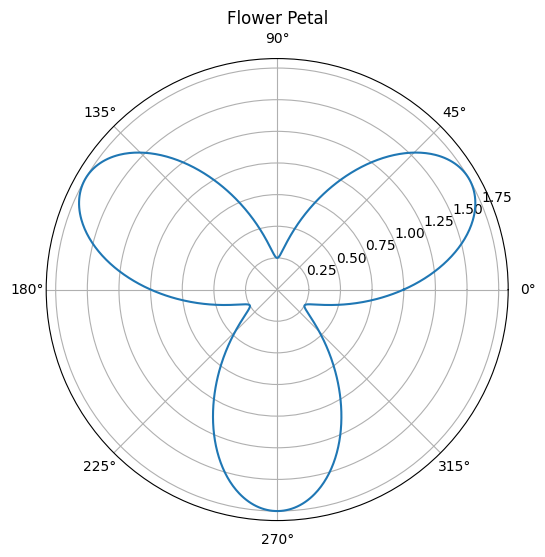

In [193]:
# 1. your code
def r(theta):
    return 1 + 3/4 * np.sin(3 * theta)

theta = np.linspace(0, 2 * np.pi, 1000)

r_values = r(theta)

# Plot the polar curve
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r_values)
ax.set_title('Flower Petal')
plt.show()


In [194]:
integrand_values = (r_values ** 2) / 2
area = np.trapz(integrand_values, theta)
area

4.025165587411923

In [195]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

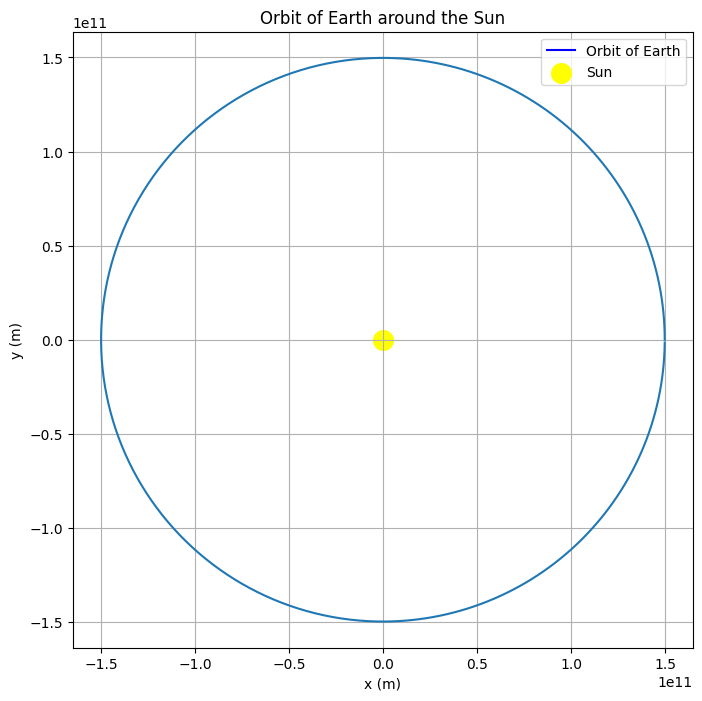

In [196]:
#solution
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from astropy.constants import G, M_sun

G = G.value  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = M_sun.value  # Mass of the sun in kg

def equations(t, u):
    x, y, vx, vy = u
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / r**3
    ay = -G * M_sun * y / r**3
    return [vx, vy, ax, ay]

r0 = 1.496e11  # Initial distance from the Sun in meters (1 AU)
v0 = 2.98e4  # Initial orbital speed in meters per second
initial_conditions = [r0, 0, 0, v0]

# Time span for one year
T = 365.25 * 24 * 3600  # One year in seconds
t_span = (0, T)
t_eval = np.linspace(0, T, 1000)

solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, rtol=1e-8)

x, y = solution.y[0], solution.y[1]

# Plot the solution
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.plot(1,1,color='blue', label='Orbit of Earth')
plt.scatter([0], [0], color='yellow', s=200, label='Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbit of Earth around the Sun')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

Fitted temperature: 2.70 K


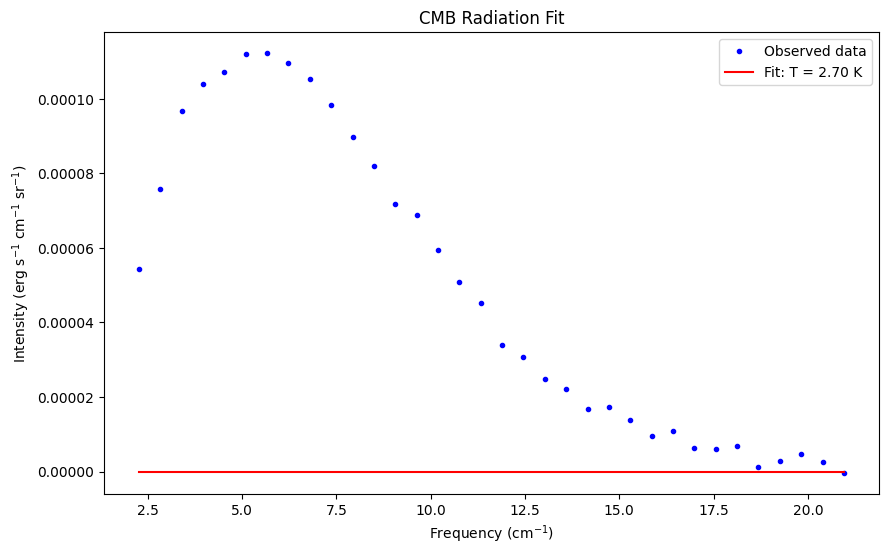

In [197]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.constants import h, c, k_B

# Load the data
data = np.loadtxt('cmb_data.txt')
nu_data = data[:, 0]  # Frequencies in cm^-1
I_data = data[:, 1]   # Intensities in erg s^-1 cm^-1 sr^-1

# Constants
h = h.cgs.value  # Planck's constant in erg s
c = c.cgs.value  # Speed of light in cm/s
k_B = k_B.cgs.value  # Boltzmann's constant in erg/K

# Black-body radiation function
def black_body(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp((h * nu) / (k_B * T)) - 1)

# Measurement error
sigma = 2e-6  # erg s^-1 cm^-1 sr^-1

# Fit the data using curve_fit with the provided sigma
popt, pcov = curve_fit(black_body, nu_data, I_data, p0=[2.7], sigma=np.full_like(I_data, sigma))
#para, pcov = curve_fit(x, y, fit_func, p0=(T0,), sigma=σ, absolute_sigma=True)
# Extract the temperature and its error
T_fit = popt[0]
T_error = np.sqrt(np.diag(pcov))[0]

print(f"Fitted temperature: {T_fit:.2f} K")

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(nu_data, I_data, 'b.', label='Observed data')
nu_fit = np.linspace(min(nu_data), max(nu_data), 1000)
I_fit = black_body(nu_fit, T_fit)
plt.plot(nu_fit, I_fit, 'r-', label=f'Fit: T = {T_fit:.2f} K')

plt.xlabel('Frequency (cm$^{-1}$)')
plt.ylabel('Intensity (erg s$^{-1}$ cm$^{-1}$ sr$^{-1}$)')
plt.title('CMB Radiation Fit')
plt.legend()
plt.show()


In [198]:
#When error is known the way to use curve_fit is 
#para, pcov = curve_fit(x, y, fit_func, p0=(T0,), sigma=σ, absolute_sigma=True)

In [199]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [200]:
#solution
# Constants
m_proton_kg = 1.6726219e-27  # mass of proton in kilograms
c = 3.0e8  # speed of light in meters per second
J_to_MeV = 6.242e12  # conversion factor from Joules to MeV

# Calculate the rest mass energy in Joules
E_Joules = m_proton_kg * c**2

# Convert the energy to MeV
E_MeV = E_Joules * J_to_MeV

print(f"Rest mass energy of a proton: {E_Joules:.2e} Joules")
print(f"Rest mass energy of a proton: {E_MeV:.2f} MeV")


Rest mass energy of a proton: 1.51e-10 Joules
Rest mass energy of a proton: 939.65 MeV


In [201]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

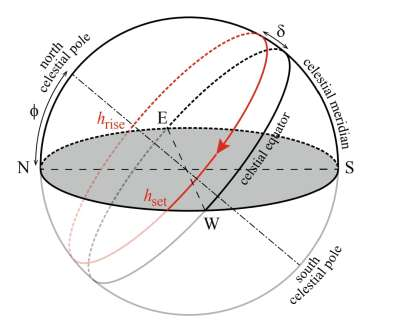

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [202]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Mercury')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.84966698, 12.20460924)>
12d12m16.59327618s
22d29m28.3s


In [203]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.6604685363974263
T =  12.685045219978324 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

## Solution

In [204]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Betelgeuse')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.407064)>
7d24m25.4304s
22d29m28.3s


In [205]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

In [206]:
#pip install astral matplotlib

## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

In [207]:
#Solution
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('example_data.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
wv_am

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

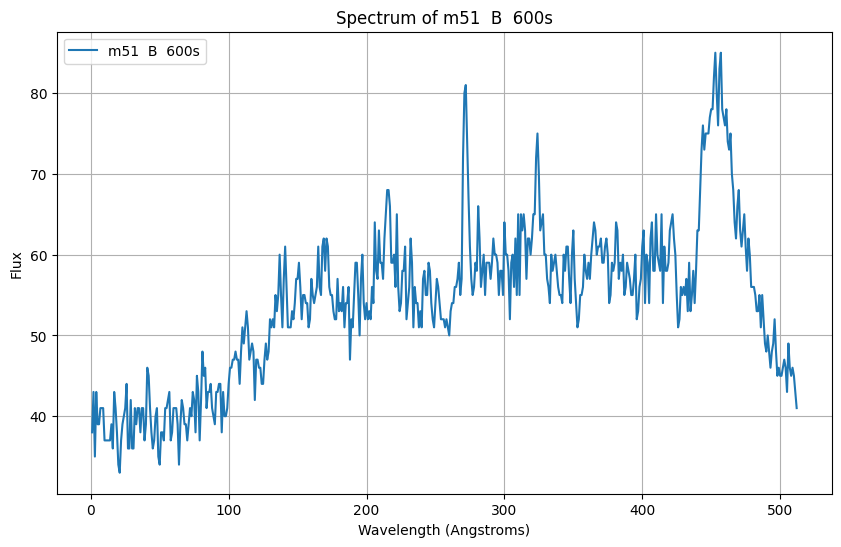

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Open the FITS file
hdul = fits.open('example_data.fits')
data = hdul[0].data
header = hdul[0].header

# Get the object name
obj_name = header.get('OBJECT', 'Unknown')

# Extract flux data (assuming 1D spectrum)
flux = data[0]

# Create WCS object for 1D spectrum
w = WCS(header, naxis=1, relax=False, fix=False)

# Convert pixel indices to wavelength values
pixel_indices = np.arange(len(flux))
wv_am = w.wcs_pix2world(pixel_indices[:, np.newaxis], 0).flatten()

# Plot the wavelength vs flux
plt.figure(figsize=(10, 6))
plt.plot(wv_am, flux, label=obj_name)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title(f'Spectrum of {obj_name}')
plt.grid(True)
plt.legend()
plt.show()

# Close the FITS file
hdul.close()


https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [208]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.